In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_original.csv')
df.head()

,ESTRES_PERCIBIDO,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EXPEMOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,...,SCL90_PSICOT,CAPE_POSIT_FREC,CAPE_POS_MALESTAR,CAPE_NEG_FREC,CAPE_NEG_MALESTAR,CAPE_DEPRE_FREC,CAPE_DEPRE_MALESTAR,TRAUMA_FRECUENCIA,TRAUMA_AFECTACION,SPQ_TOTAL_ESQUIZOT
0,23,17,5,0,0,7,5,13,2,20,...,0,24,4,14,0,8,0,4,8,0
1,22,13,11,3,10,6,11,17,11,17,...,9,22,2,29,33,11,3,9,29,0
2,10,20,20,20,16,11,8,3,0,20,...,5,30,9,29,21,10,2,12,25,1
3,7,12,1,0,7,4,6,3,1,18,...,0,20,0,16,2,8,0,4,10,0
4,31,8,9,17,13,4,14,2,6,27,...,17,35,13,36,26,19,19,17,48,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 80% de los datos para entrenamiento y un 20% de los datos para validación
valid_idx  =  range ( len ( df ) - 57 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_EXPEMOC', 'CSI_EVITPROBL', 'CAPE_DEPRE_MALESTAR', 'SCL90_PSICOT', 'CSI_RESPROBL', 'CSI_PENSDESID', 'CSI_REESTCOGN', 'SCL90_OBS_COMP', 'CAPE_POSIT_FREC', 'CSI_APOYOSOC', 'CSL90_HOSTIL', 'SCL90_ANS_FOB', 'CAPE_NEG_FREC', 'SCL90_ANSIE', 'TRAUMA_AFECTACION', 'CAPE_POS_MALESTAR', 'CSL90_SENS_INT', 'SCL90_SOMAT', 'CAPE_NEG_MALESTAR', 'CSI_AUTOCRIT', 'ANSIEDADRASGO', 'CAPE_DEPRE_FREC', 'TRAUMA_FRECUENCIA', 'ESTRES_PERCIBIDO', 'SCL90_DEPRE', 'SCL90_IDEA_PARAN', 'CSI_RETISOC']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-0.768118  0.323421 -0.78109  -0.176897 ... -0.427821 -0.616215 -0.513865 -1.250074]
 [ 0.741745  0.106226 -0.918154 -0.701289 ... -2.31188  -1.01484  -0.899054 -1.250074]
 [-1.711782  1.626588 -0.232831 -0.176897 ...  0.749715 -0.21759  -0.70646   0.64713 ]
 [-0.768118 -0.328163  0.452493 -0.176897 ...  0.160947 -0.297315 -0.321271 -0.196072]
 [ 1.11921   1.192199 -0.369895 -0.570191 ... -0.310068 -0.297315  0.063918 -1.039274]]
[1 0 0 0 0]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.954805,0.973400,0.649123,13:59
1,0.860828,0.921750,0.684211,03:36
2,0.801232,0.908024,0.684211,03:26
3,0.766753,0.905498,0.649123,03:17
4,0.722209,0.897089,0.666667,03:07
5,0.683462,0.878871,0.666667,03:23
6,0.648686,0.856570,0.649123,03:42
7,0.614190,0.849712,0.649123,03:21
8,0.580580,0.847857,0.649123,03:44
9,0.552038,0.831005,0.649123,03:19


CSI_EXPEMOC,CSI_EVITPROBL,CAPE_DEPRE_MALESTAR,SCL90_PSICOT,CSI_RESPROBL,CSI_PENSDESID,CSI_REESTCOGN,SCL90_OBS_COMP,CAPE_POSIT_FREC,CSI_APOYOSOC,CSL90_HOSTIL,SCL90_ANS_FOB,CAPE_NEG_FREC,SCL90_ANSIE,TRAUMA_AFECTACION,CAPE_POS_MALESTAR,CSL90_SENS_INT,SCL90_SOMAT,CAPE_NEG_MALESTAR,CSI_AUTOCRIT,ANSIEDADRASGO,CAPE_DEPRE_FREC,TRAUMA_FRECUENCIA,ESTRES_PERCIBIDO,SCL90_DEPRE,SCL90_IDEA_PARAN,CSI_RETISOC,target,prediction
-1.7118,-0.3282,0.8637,0.6097,-0.3240,-0.7051,-0.2256,0.1981,0.6420,-1.0794,0.4484,-0.6993,0.3031,-0.1922,0.8081,1.3670,1.0002,-0.8431,0.9705,0.6547,-0.1457,0.3497,0.2933,0.8675,-0.0581,1.0269,-0.1961,1,1
-0.5794,-0.7626,-0.6440,0.0853,-0.9271,-1.2034,-0.5934,-0.1229,-0.3147,-0.9116,0.0241,-0.6993,0.3031,-0.6718,-0.3432,-0.5598,-0.2053,-0.1643,0.6075,-0.9016,-0.1457,-0.5630,0.1049,-0.0746,-0.3770,-0.3213,-1.0393,0,1
0.1755,0.7578,-1.3293,-0.8324,-0.5250,-0.3729,0.1421,-1.1926,-1.1120,0.0953,-0.8246,-0.6993,-1.4286,-0.9116,-1.4518,-1.0131,-1.0089,-1.0370,-1.4797,0.8276,-4.0316,-1.2475,-1.2139,0.9852,-1.0148,-0.8991,0.6471,1,0
0.1755,-0.1110,0.8637,-0.7013,-0.5250,-0.2067,-0.7772,0.3050,-0.7931,-0.2404,-0.6124,-0.5171,0.8359,-0.6718,-0.4285,-0.6731,-0.6071,-0.5522,1.1520,0.3089,-0.1457,0.5779,0.0107,-0.0746,-0.3770,-0.7065,0.0147,0,0
1.3079,-1.1969,1.1378,0.7408,0.0781,1.2883,-1.3288,1.5888,0.4825,-0.4082,1.2971,0.3938,0.7027,1.3666,-0.7696,0.8003,0.3305,1.0963,0.6075,0.1359,0.6639,0.8061,-0.6487,1.5740,2.2539,0.8343,0.2255,1,1


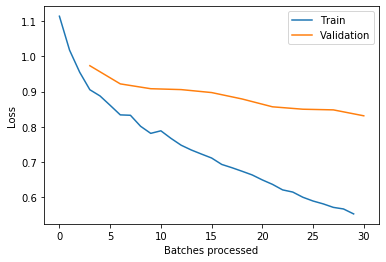

In [10]:
learn.recorder.plot_losses()
learn.show_results()